# ZOMATO DATA ANALYSIS PROJECT

In [18]:
import matplotlib .pyplot as plt

In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
DataFrame = pd.read_csv("Zomato data .csv")

In [4]:
DataFrame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value [0];
    return float (value)

DataFrame['rate'] = DataFrame['rate'].apply(handleRate)
print(DataFrame.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

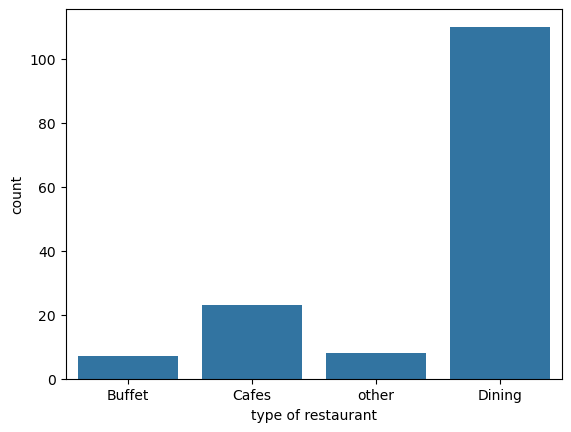

In [8]:
sns.countplot(x=DataFrame['listed_in(type)'])
plt.xlabel("type of restaurant")

 # CONCLUSION - majority of the resturant falls in dining category

Text(0, 0.5, 'votes')

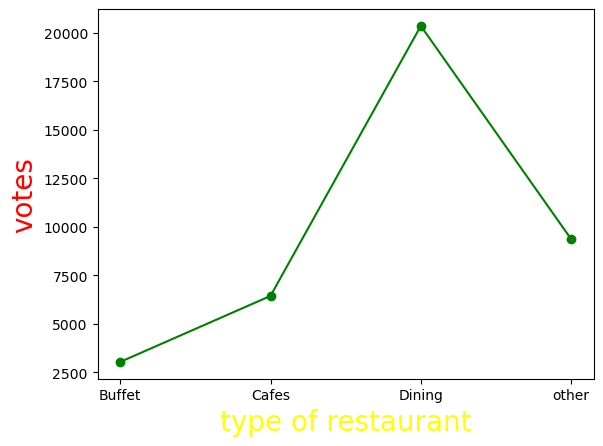

In [11]:
grouped_data = DataFrame.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker ="o")
plt.xlabel("type of restaurant",c = "yellow",size = 20)
plt.ylabel("votes",c = "red", size = 20)

# CONCLUSION-dining restaurant has recived maximum votes

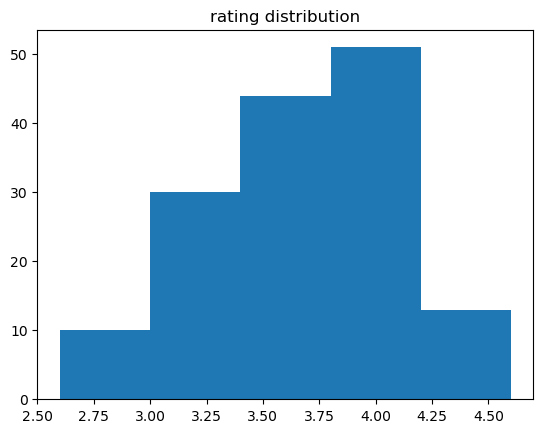

In [12]:
plt.hist(DataFrame['rate'],bins=5)
plt.title("rating distribution")
plt.show()

# CONCLUSION - the majority restaurant recives rating from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

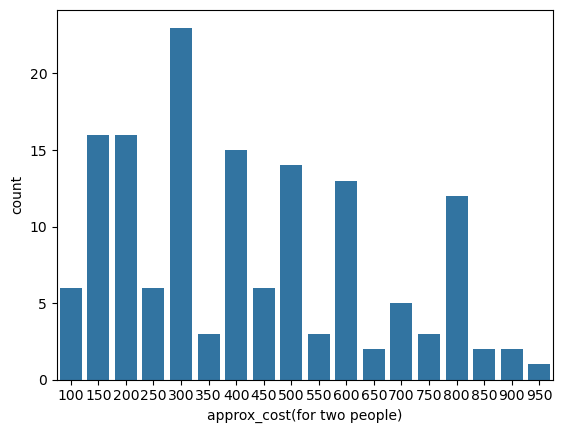

In [13]:
couple_data = DataFrame['approx_cost(for two people)']
sns.countplot(x=couple_data)

# CONCLUSION - the majority of couples prefer restaurant with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

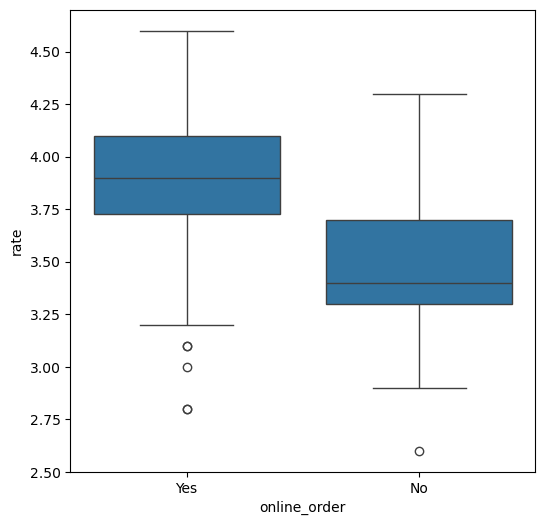

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(x= 'online_order', y = 'rate',data = DataFrame)

# CONCLUSION - the majority is offline order recevied lower rating comparison to online order 

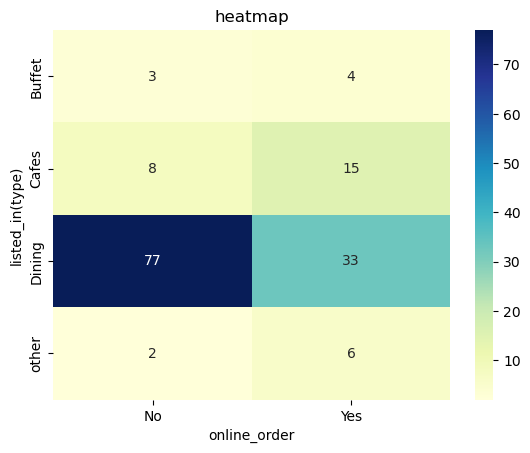

In [16]:
pivot_table = DataFrame.pivot_table(index='listed_in(type)',columns ='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("heatmap")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()

# CONCULSION - dining restaurant primarily accpet offline orders, whereas cafes primarily recives online orders .this suggests that client prefrences orders in person at restaurants, but prefer online ordering at cafes